<a href="https://colab.research.google.com/github/idocarmo/LAB6/blob/main/frequency_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Randomness Test
## Validating the Bit Array 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.integrate import quad

In [2]:
matplotlib.rcParams.update({'font.size': 14})
plt.style.use('ggplot')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
FOLDER_PATH = r"/content/drive/MyDrive/LAB6/data/02_processed/"

In [5]:
BACKGROUND_FILE = "bit_fundo.csv"
CESIUM_25MM_FILE = "bit_25mm_cs.csv"
CESIUM_65MM_FILE = "bit_65mm_cs.csv"

In [6]:
bit_background = np.loadtxt(FOLDER_PATH + BACKGROUND_FILE, delimiter=" ", dtype=int)

In [7]:
bit_25mm_cs = np.loadtxt(FOLDER_PATH + CESIUM_25MM_FILE, delimiter=" ", dtype=int)

In [8]:
bit_65mm_cs = np.loadtxt(FOLDER_PATH + CESIUM_65MM_FILE, delimiter=" ", dtype=int)

### Sequences Autocorrelation

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

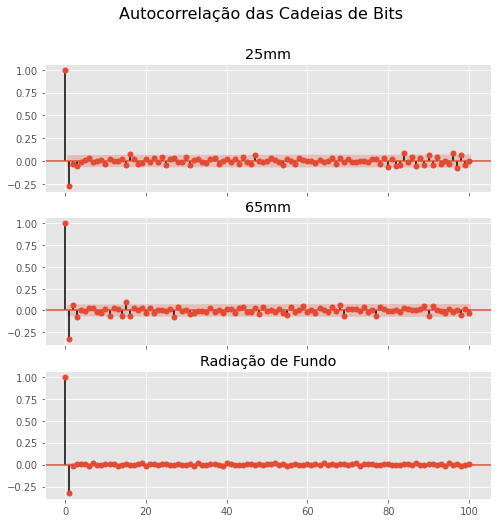

In [13]:
fig, ax = plt.subplots(3,1, figsize=(8,8), sharex=True)

fig.suptitle('Autocorrelação das Cadeias de Bits', size=16)

plot_acf(bit_25mm_cs[:1000], lags=100, ax=ax[0])
ax[0].set_title('25mm')

plot_acf(bit_65mm_cs[:1000], lags=100, ax=ax[1])
ax[1].set_title('65mm')

plot_acf(bit_background, lags=100, ax=ax[2])
ax[2].set_title('Radiação de Fundo')

plt.savefig('autocorrelacao.png')
plt.show()

## Frequency Test

In [14]:
def erfc(s):
    """Complementary Error Function
    """
    def integrand(u):
        return (2/np.sqrt(np.pi))*np.exp(-u**2)

    return quad(integrand, s, np.inf)[0]

In [15]:
def frequency_test(bit_array: np.array, n_bit_streams: int=2) -> np.array:
    bit_array = bit_array.copy()

    bit_array = bit_array.reshape(n_bit_streams, -1)

    pvalue_array = np.zeros(n_bit_streams, dtype=float)

    for i, bit_stream in enumerate(bit_array):
        S = abs(sum(bit_stream==1) - sum(bit_stream==0))
        s_obs = S/np.sqrt(bit_stream.size)
        
        pvalue = erfc(s_obs/np.sqrt(2))

        pvalue_array[i] = pvalue

    return pvalue_array

In [16]:
p_valor_back = frequency_test(bit_background, n_bit_streams=10)
p_valor_25 = frequency_test(bit_25mm_cs, n_bit_streams=1000)
p_valor_65 = frequency_test(bit_65mm_cs, n_bit_streams=1000)

In [17]:
sum(p_valor_back>=0.01)

10

In [18]:
sum(p_valor_25>=0.01)

1000

In [19]:
sum(p_valor_65>=0.01)

1000

### P-value Distribution

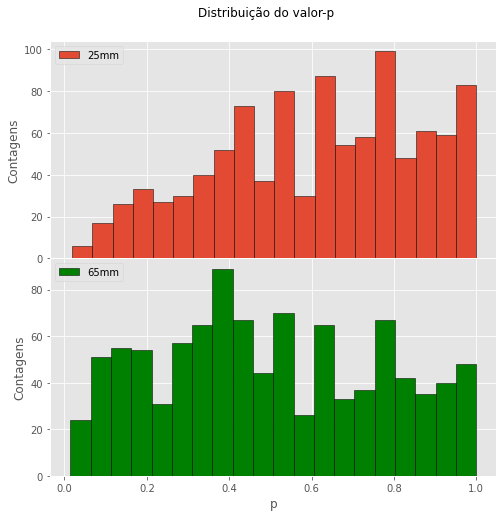

In [20]:
fig, ax = plt.subplots(2,1, figsize=(8,8), sharex=True, gridspec_kw={'hspace':0})

fig.suptitle('Distribuição do valor-p', y=0.94)

ax[0].hist(p_valor_25, bins=20, edgecolor='black', label='25mm')
ax[1].hist(p_valor_65, bins=20, color='green', edgecolor='black', label='65mm')

ax[0].set_ylabel('Contagens')
ax[0].legend(loc='upper left')

ax[1].set_ylabel('Contagens')
ax[1].set_xlabel('p')
ax[1].legend(loc='upper left')

plt.savefig('histograma_p.png')
plt.show()